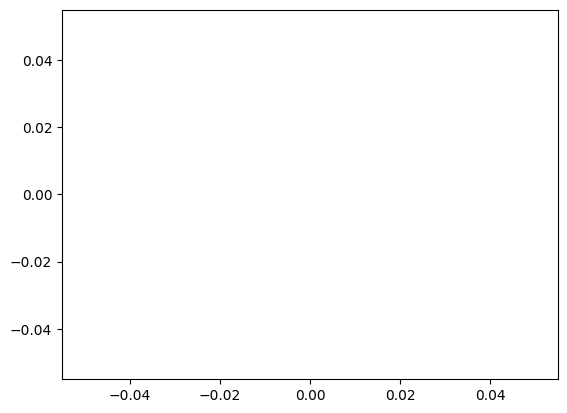

In [1]:
import matplotlib.pyplot as plt

plt.plot([], [])

# Book

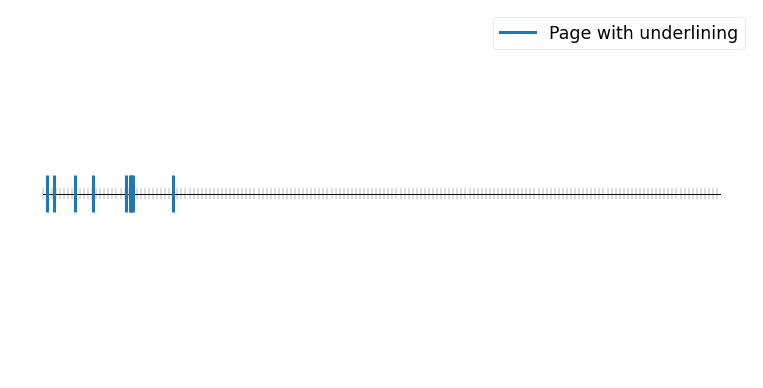

In [2]:
import matplotlib.pyplot as plt
import numpy as np


with plt.style.context('seaborn-talk'):
    fig, ax = plt.subplots(figsize=(10, 5), dpi=96)
    
    N = 500
    U = np.cumsum(np.array([3, 5, 15, 14, 24, 3, 1, 1, 30]))
    
    ax.plot([0, N], [0, 0], color='k', lw=.7)
    
    for t in np.arange(N)[::3]:
        ax.vlines(t, -.03, .03, color='k', lw=.2)
    for ux in U:
        ax.vlines(ux, -.1, .1)
    
    ax.set_xticks([])
    ax.set_yticks([])
    
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
    
    ax.set_ylim([-1, 1])

    ax.plot([], [], color='C0', label='Page with underlining')

    ax.legend()

    # fig.savefig('presentation-assets/book-timeline.png', transparent=True)

# Cryptogram

## Problem

In [3]:
import string
import textwrap
import time

import numpy as np
from IPython.display import HTML, clear_output


rng = np.random.default_rng(0)
cipher = {a: b for a, b in zip(string.ascii_uppercase, sorted(string.ascii_uppercase, key=lambda x: rng.random()))}

c = ('''
The great ships hung motionless in the air,...
a blasphemy against nature...
The ships hung in the sky in much the same way that bricks don't.
''').upper()


encryption = c.translate(str.maketrans(cipher))

def get_chunk(i):
    out = []
    for L1, L2 in zip(c.strip().split('\n'), encryption.strip().split('\n')):
        out.append(f'''
            <span style="color: grey"><tt>{L1}</tt></span>
            <br>
            <span><tt><strong>{L2[:i]}</strong></tt></span>
            <br><br>
        ''')
    return '\n'.join(out)


def f():
    for i in range(max(len(s) for s in c.split('\n'))):
        clear_output(wait=True)
        display(HTML(get_chunk(i+1)))
        time.sleep(.07)

f()

In [7]:
cipher = {'A': 'L',
 'B': 'D',
 'C': 'U',
 'D': 'N',
 'E': 'C',
 'F': 'V',
 'G': 'P',
 'H': 'B',
 'I': 'S',
 'J': 'Z',
 'K': 'T',
 'L': 'R',
 'M': 'I',
 'N': 'G',
 'O': 'Y',
 'P': 'A',
 'Q': 'X',
 'R': 'W',
 'S': 'H',
 'T': 'Q',
 'U': 'E',
 'V': 'K',
 'W': 'M',
 'X': 'O',
 'Y': 'F',
 'Z': 'J'}

t1 = 'OBC PWCLO HBSAH'
t2 = 'OBLO DWSUTH NYG\'O'

cipher['T'], cipher['Q'] = cipher['Q'], cipher['T']
for i, (w1, w2) in enumerate(zip(t1.split(), t1.translate(str.maketrans({v: k for k, v in cipher.items()})).split())):
    ax.annotate(w1, (0, 6-i))
    ax.annotate(w2, (0, 6-i))
t2.translate(str.maketrans({v: k for k, v in cipher.items()}))

"XHAX BRICKS DON'X"

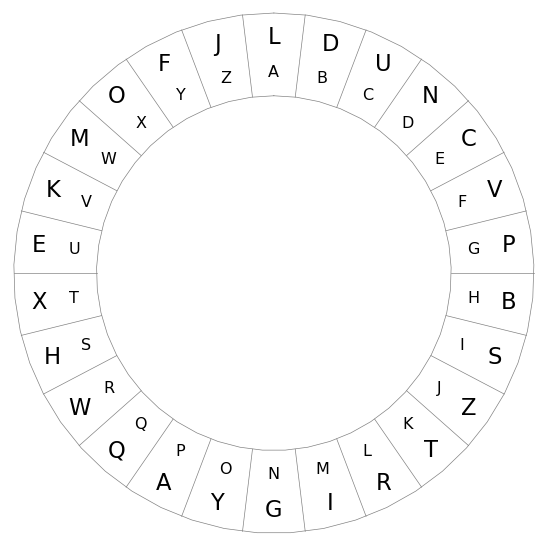

In [5]:
import matplotlib.pyplot as plt
import numpy as np


with plt.style.context('seaborn-talk'):
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, dpi=96)
    
    r1, r2 = 1., .85
    for i, (k, v) in enumerate(cipher.items()):
        θ = -(i/len(cipher)*2*np.pi)
        ax.annotate(v, (θ, r1), ha='center', va='center', fontsize=17)
        ax.annotate(k, (θ, r2), ha='center', va='center', fontsize=12)
        ax.plot(np.array([θ, θ]) + (1/len(cipher)*np.pi), [.75, 1.1], color='C7', lw=.5)
    
    ax.plot(np.linspace(0, 1)*2*np.pi, np.array([1.1]*50), color='C7', lw=.5)
    ax.plot(np.linspace(0, 1)*2*np.pi, np.array([.75]*50), color='C7', lw=.5)
    
    ax.set_theta_zero_location('N')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.spines['polar'].set_visible(False)
    ax.grid(False)

## Solver

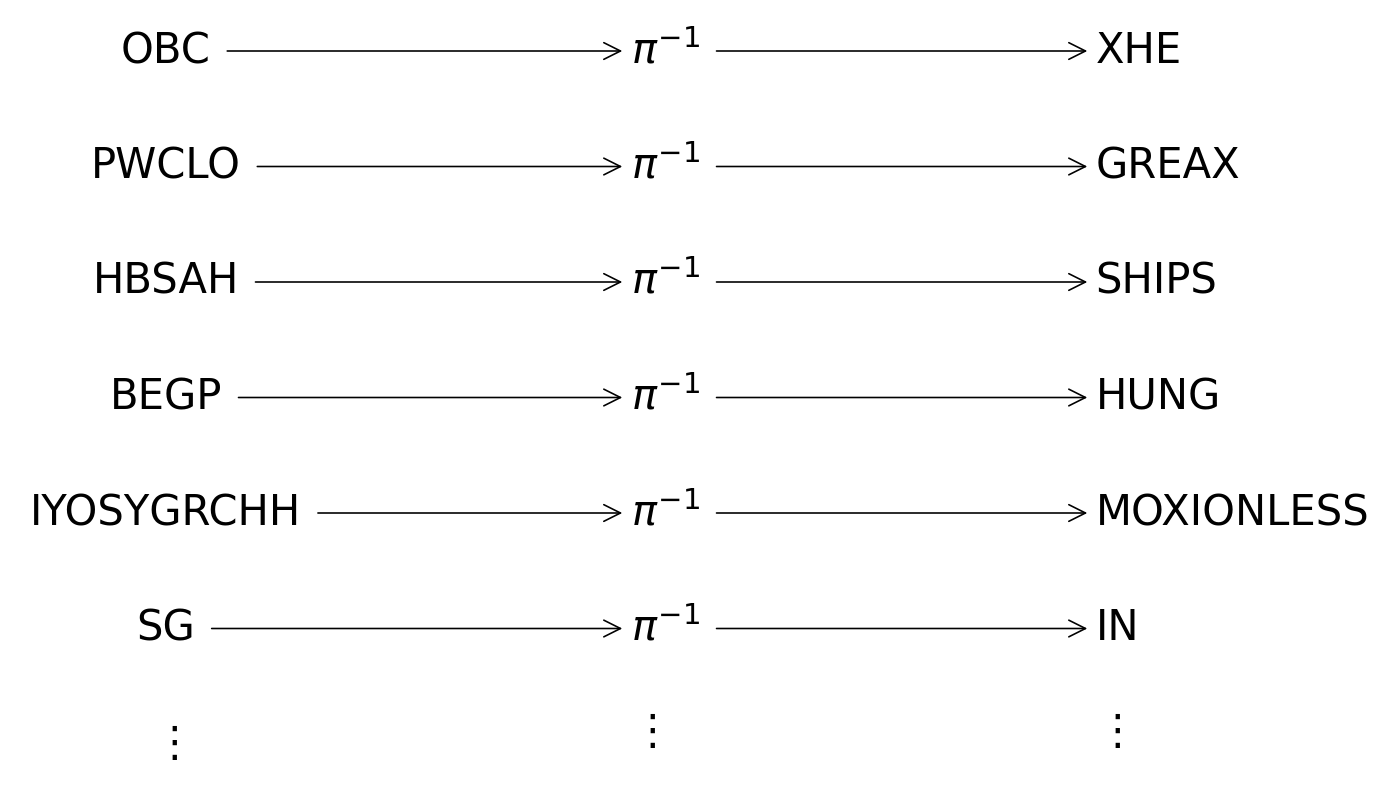

In [12]:
import matplotlib.pyplot as plt


with plt.style.context('seaborn-talk'):
    fig, ax = plt.subplots(dpi=300, figsize=(4, 3))
    
    cipher = {'A': 'L',
     'B': 'D',
     'C': 'U',
     'D': 'N',
     'E': 'C',
     'F': 'V',
     'G': 'P',
     'H': 'B',
     'I': 'S',
     'J': 'Z',
     'K': 'T',
     'L': 'R',
     'M': 'I',
     'N': 'G',
     'O': 'Y',
     'P': 'A',
     'Q': 'X',
     'R': 'W',
     'S': 'H',
     'T': 'Q',
     'U': 'E',
     'V': 'K',
     'W': 'M',
     'X': 'O',
     'Y': 'F',
     'Z': 'J'}
    
    t1 = 'OBC PWCLO HBSAH BEGP IYOSYGRCHH SG'
    
    cipher['T'], cipher['Q'] = cipher['Q'], cipher['T']
    
    for j, (w1, w2) in enumerate(zip(t1.split(), t1.translate(str.maketrans({v: k for k, v in cipher.items()})).split())):
        p1, p2, p3 = (0, 6-j), (1, 6-j), (2, 6-j)
        ax.annotate(w1, p2, xytext=p1, ha='center', va='center', arrowprops=dict(arrowstyle='->'))
        ax.annotate('$\pi^{-1}$', p3, xytext=p2, ha='left', va='center', arrowprops=dict(arrowstyle='->'))
        ax.annotate(w2, p3, ha='left', va='center')
    ax.annotate(r'$\vdots$', (0, 6-j-1), ha='center', va='center')
    ax.annotate(r'$\vdots$', (1, 6-j-1))
    ax.annotate(r'$\vdots$', (2, 6-j-1))
    ax.plot([], [])
    
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 6)
    ax.set_xticks([])
    ax.set_yticks([])
    
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)


(0, 3.0)
(0, 5.0)


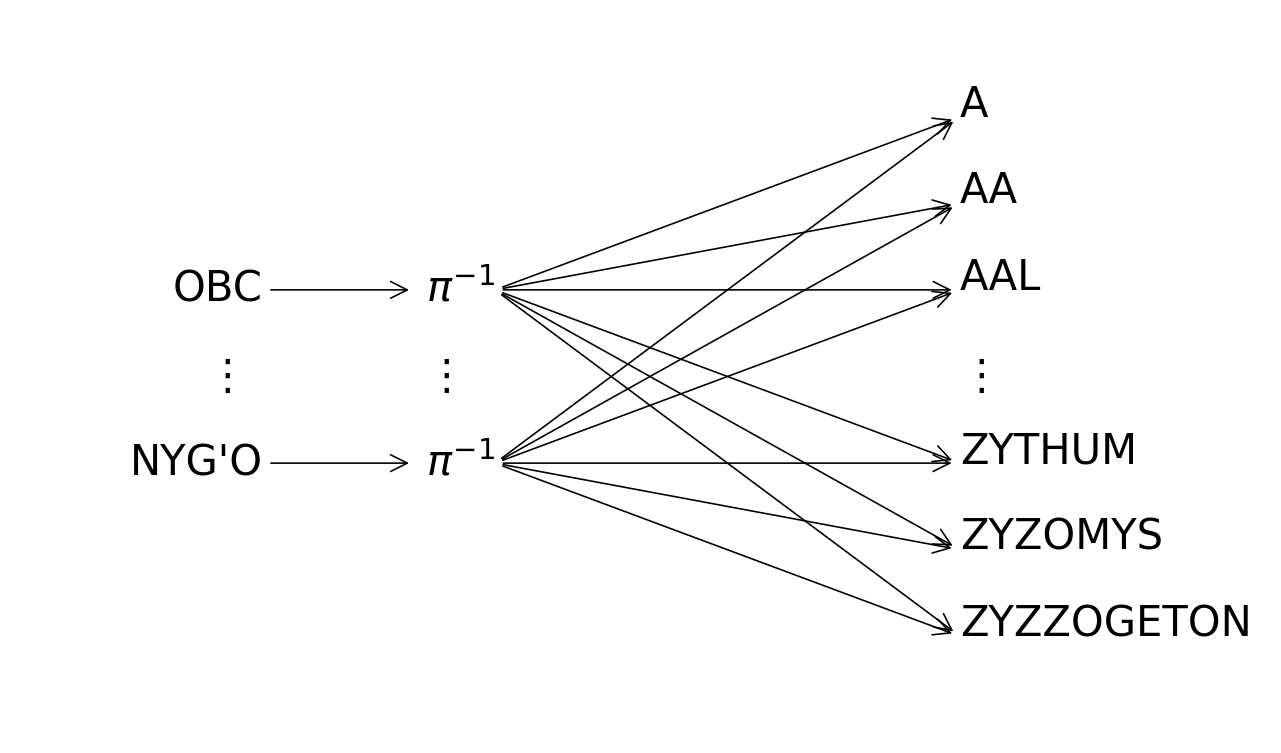

In [15]:
import matplotlib.pyplot as plt


with plt.style.context('seaborn-talk'):
    fig, ax = plt.subplots(dpi=300, figsize=(4, 3))
    
    
    w = [
        w.upper()
        for w in ['A', 'AA', 'AAL', '', 'zythum', 'Zyzomys', 'Zyzzogeton']
    ]
    w_prime = ['OBC', 'NYG\'O']
    
    for i, wp in enumerate(reversed(w_prime)):
        p1 = (0, len(w)/2 + i*2 - .5)
        print(p1)
        ax.annotate(wp, p1, ha='right', va='center')
        p2 = (1, p1[1])
        ax.annotate('$\pi^{-1}$', p1, p2, ha='right', va='center', arrowprops=dict(arrowstyle='<-'))
        for j, wi in enumerate(w):
            if not wi:
                continue
            p3 = (3, len(w)-j)
            ax.annotate('', p2, xytext=p3, ha='right', va='center', arrowprops=dict(arrowstyle='<-'))
            if i == 0:
                ax.annotate(wi, p3)
    
    # for i, wi in enumerate(reversed(w_prime)):
        # p2 = (3, len(w)/2 + j*2 - .5)
        # ax.annotate(f'$P(w^{{\prime}}=${wp}$\\vert w, \pi)P(w)$', p2, ha='left', va='center')
    ax.annotate(r'$\vdots$  ', (0, len(w)/2+.5), ha='right', va='center')
    ax.annotate(r'$\vdots$   ', (1, len(w)/2+.5), ha='right', va='center')
    ax.annotate(r'$\vdots$', (3, len(w)/2+.5), ha='left', va='center')
    
    ax.set_xlim(-1, 3)
    ax.set_ylim(0, len(w)+1)
    
    
    ax.set_xticks([]), ax.set_yticks([])
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
    
    
    # ax.annotate('$n$', xy=(-1, len(w)/2+.5), xytext=(-1, len(w)/2+.5),
    #             ha='left', va='bottom',
    #             arrowprops=dict(arrowstyle='-[, widthB=2.0, lengthB=1., angleB=90', color='k'))

(3, 3.0)
(3, 5.0)


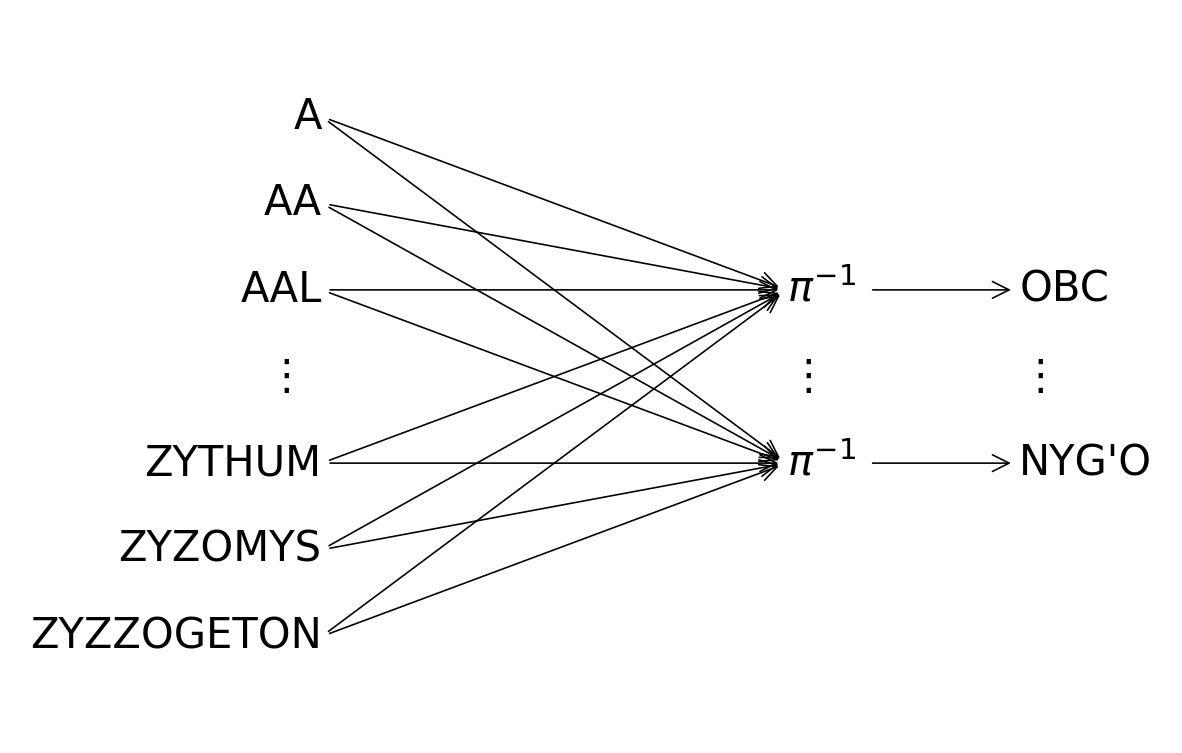

In [16]:
import matplotlib.pyplot as plt


with plt.style.context('seaborn-talk'):
    fig, ax = plt.subplots(dpi=300, figsize=(4, 3))
    
    
    w = [
        w.upper()
        for w in ['A', 'AA', 'AAL', '', 'zythum', 'Zyzomys', 'Zyzzogeton']
    ]
    w_prime = ['OBC', 'NYG\'O']
    
    for i, wp in enumerate(reversed(w_prime)):
        p1 = (3, len(w)/2 + i*2 - .5)
        print(p1)
        ax.annotate(wp, p1, ha='left', va='center')
        p2 = (2, p1[1])
        ax.annotate('$\pi^{-1}$', p1, p2, ha='left', va='center', arrowprops=dict(arrowstyle='->'))
        for j, wi in enumerate(w):
            if not wi:
                continue
            p3 = (0, len(w)-j)
            ax.annotate('', p2, xytext=p3, ha='right', va='center', arrowprops=dict(arrowstyle='->'))
            if i == 0:
                ax.annotate(wi, p3, ha='right', va='center')
    
    # for i, wi in enumerate(reversed(w_prime)):
        # p2 = (3, len(w)/2 + j*2 - .5)
        # ax.annotate(f'$P(w^{{\prime}}=${wp}$\\vert w, \pi)P(w)$', p2, ha='left', va='center')
    ax.annotate(r'$\vdots$  ', (0, len(w)/2+.5), ha='right', va='center')
    ax.annotate(r'$\vdots$   ', (2, len(w)/2+.5), ha='left', va='center')
    ax.annotate(r'$\vdots$', (3, len(w)/2+.5), ha='left', va='center')
    
    ax.set_xlim(-1, 3)
    ax.set_ylim(0, len(w)+1)
    
    
    ax.set_xticks([]), ax.set_yticks([])
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
    
    
    # ax.annotate('$n$', xy=(-1, len(w)/2+.5), xytext=(-1, len(w)/2+.5),
    #             ha='left', va='bottom',
    #             arrowprops=dict(arrowstyle='-[, widthB=2.0, lengthB=1., angleB=90', color='k'))

In [6]:
import string

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns



π = np.zeros((26, 26))
π[np.arange(len(π)), np.vectorize(string.ascii_uppercase.index)(list(cipher.values()))] = 1

# sns.heatmap(π, ax=ax, cmap='Blues', cbar=False)
# _ = ax.set_yticks(np.arange(len(cipher)), cipher.keys(), rotation=0)
# _ = ax.set_xticks(np.arange(len(cipher)), cipher.values(), rotation=0)

with pd.option_context('display.max_columns', 10, 'display.max_rows', 10):
    display(
        pd.DataFrame(π, columns=list(string.ascii_uppercase), index=cipher.keys()).astype(int).applymap(lambda x: '$0$' if x==0 else '$\textbf{1}$')
    )

/var/folders/7n/5sf3x4qx2c1gct2h_hrfsn_m0000gn/T/ipykernel_2483/1362203948.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pd.DataFrame(π, columns=list(string.ascii_uppercase), index=cipher.keys()).astype(int).applymap(lambda x: '$0$' if x==0 else '$\textbf{1}$')


,A,B,C,D,E,...,V,W,X,Y,Z
A,$0$,$0$,$0$,$0$,$0$,...,$0$,$0$,$0$,$0$,$0$
B,$0$,$0$,$0$,$\textbf{1}$,$0$,...,$0$,$0$,$0$,$0$,$0$
C,$0$,$0$,$0$,$0$,$0$,...,$0$,$0$,$0$,$0$,$0$
D,$0$,$0$,$0$,$0$,$0$,...,$0$,$0$,$0$,$0$,$0$
E,$0$,$0$,$\textbf{1}$,$0$,$0$,...,$0$,$0$,$0$,$0$,$0$
...,...,...,...,...,...,...,...,...,...,...,...
V,$0$,$0$,$0$,$0$,$0$,...,$0$,$0$,$0$,$0$,$0$
W,$0$,$0$,$0$,$0$,$0$,...,$0$,$0$,$0$,$0$,$0$
X,$0$,$0$,$0$,$0$,$0$,...,$0$,$0$,$0$,$0$,$0$
Y,$0$,$0$,$0$,$0$,$0$,...,$0$,$0$,$0$,$0$,$0$


# Immaculatge Grid

In [ ]:
import cv2
import numpy as np

def change_perspective(image, src_points, dst_points):
    # Define the transformation matrix
    M = cv2.getPerspectiveTransform(src_points, dst_points)

    # Apply the perspective transformation
    transformed_image = cv2.warpPerspective(image, M, (image.shape[1], image.shape[0]))

    return transformed_image

# Load the image
image = cv2.imread('/Users/dantegates/Desktop/Screenshot 2024-02-17 at 6.50.43 AM.png')
# image = cv2.imread('presentation-assets/jamie-moyer.jpeg')

# Define the source and destination points for perspective transformation
src_points = np.float32([[0, 0], [image.shape[1] - 1, 0], [0, image.shape[0] - 1], [image.shape[1] - 1, image.shape[0] - 1]])

# Specify the percentage reduction of the height (e.g., 20% reduction)
height_reduction_percentage = 20
reduction_pixels = int(image.shape[0] * (height_reduction_percentage / 100))

# Adjust destination points for the desired transformation
dst_points = np.float32([[0, 0], [image.shape[1] - 1, reduction_pixels], [0, image.shape[0] - 1], [image.shape[1] - 1, image.shape[0] - 1 - reduction_pixels]])


# Change the perspective of the image
transformed_image = change_perspective(image, src_points, dst_points)

# cv2.imwrite('presentation-assets/player-attributes-warped.jpeg', transformed_image)
# Display the original and transformed images
# cv2.imshow('Original Image', image)
# cv2.imshow('Transformed Image', transformed_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# CLV DAG

/Users/dantegates/virtualenvs/default/lib/python3.9/site-packages/pymc/data.py:433: UserWarning: The `mutable` kwarg was not specified. Before v4.1.0 it defaulted to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default changed to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Use `pm.ConstantData`/`pm.MutableData` or pass `pm.Data(..., mutable=False/True)` to avoid this warning.
  warnings.warn(


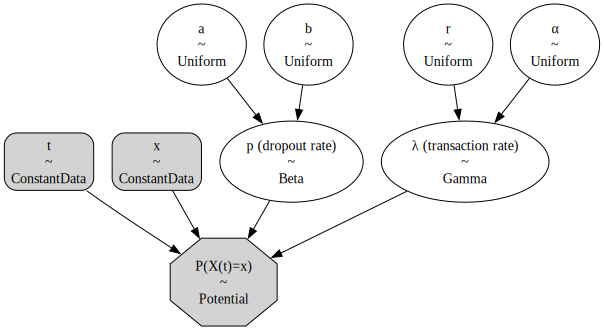

In [17]:
import pymc as pm

with pm.Model() as model:
    x = pm.Data('x', 0)
    t = pm.Data('t', 0)
    
    # rate
    r = pm.Uniform('r', 0, 1000)
    α = pm.Uniform('α', 0, 1000)
    λ = pm.Gamma('λ (transaction rate)', r, α)

    # dropout
    a = pm.Uniform('a', 0, 1000)
    b = pm.Uniform('b', 0, 1000)
    p = pm.Beta('p (dropout rate)', a, b)

    # likelihood
    likelihood = pm.Potential('P(X(t)=x)', λ * p * x * t)

pm.model_to_graphviz(model)